<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/Tarea_20_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
  **La normalización Min-Max no afecto la distribución normal ya que al parecer solo cambio la escala de datos de 0-1 pero todo sigue igual**

2. ¿Qué interpretas del p-valor antes y después de la normalización?
  **Shapiro-Wilk probablemente rechace la normalidad (p-valor(0.02005) <0.05)**

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar el dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

display(wine_df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
import scipy.stats as stats
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(wine_df['alcohol'].sample(min(5000, len(wine_df['alcohol'])), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

Shapiro-Wilk Test: p-valor = 0.02005


In [11]:
min_al = wine_df['alcohol'].min()
max_al = wine_df['alcohol'].max()

wine_df['alcohol_normalizado'] = (wine_df['alcohol'] - min_al) / (max_al - min_al)
wine_df['alcohol_normalizado']

,alcohol_normalizado
0,0.842105
1,0.571053
2,0.560526
3,0.878947
4,0.581579
...,...
173,0.705263
174,0.623684
175,0.589474
176,0.563158


In [12]:
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(wine_df['alcohol_normalizado'].sample(min(5000, len(wine_df['alcohol_normalizado'])), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

Shapiro-Wilk Test: p-valor = 0.02005


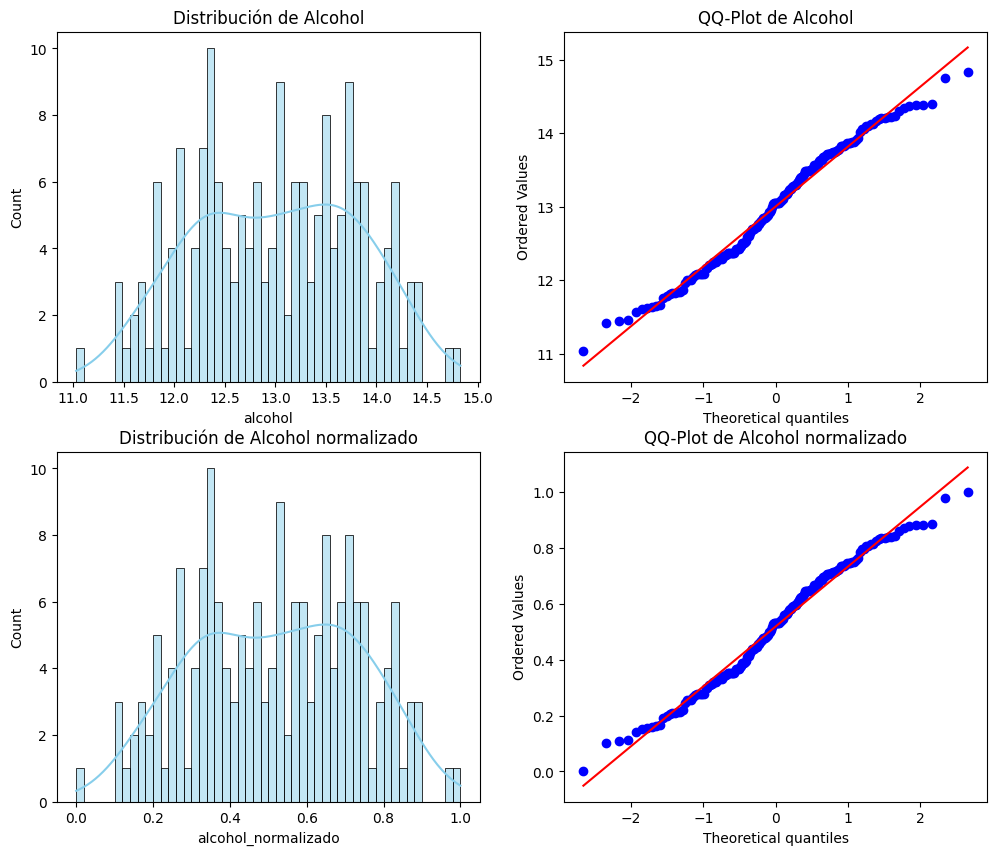

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

plt.figure(figsize=(12, 10))
# Histograma
plt.subplot(2, 2, 1)
sns.histplot(wine_df['alcohol'], bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de Alcohol")

# QQ-Plot
plt.subplot(2, 2, 2)
stats.probplot(wine_df['alcohol'], dist="norm", plot=plt)
plt.title(f"QQ-Plot de Alcohol")

# Histograma
plt.subplot(2, 2, 3)
sns.histplot(wine_df['alcohol_normalizado'], bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de Alcohol normalizado")

# QQ-Plot
plt.subplot(2, 2, 4)
stats.probplot(wine_df['alcohol_normalizado'], dist="norm", plot=plt)
plt.title(f"QQ-Plot de Alcohol normalizado")

plt.show()

# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?
